In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
from scripts.data_vectors import DataVectors
import scripts.data_vector_metrics as h
import scripts.plotting as p
import matplotlib.pyplot as plt
from scripts.presets import Presets
from scripts.galaxy_bias import GalaxyBias
from scripts.systematics_metrics import SystematicsMetrics

I am using pyccl version 2.8.0


In [2]:
redshift_max = 3.5
redshift_resolution = 300  # this is the first resolution of redshifts
forecast_year = "10"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution,
                  forecast_year=forecast_year)

gbias = GalaxyBias(presets).get_galaxy_bias()

In [4]:
%%time
sm = SystematicsMetrics(presets)
galaxy_bias_zres_sweep = sm.galaxy_bias_zres_sweep()

Data saved to data_output/galaxy_bias/galaxy_bias_zres_sweep_y10_zmax3.5_ccl_v2.8.0.npy
CPU times: user 8.14 s, sys: 266 ms, total: 8.41 s
Wall time: 8.81 s


In [9]:
galaxy_bias_zres_sweep[300][0]

1.09066

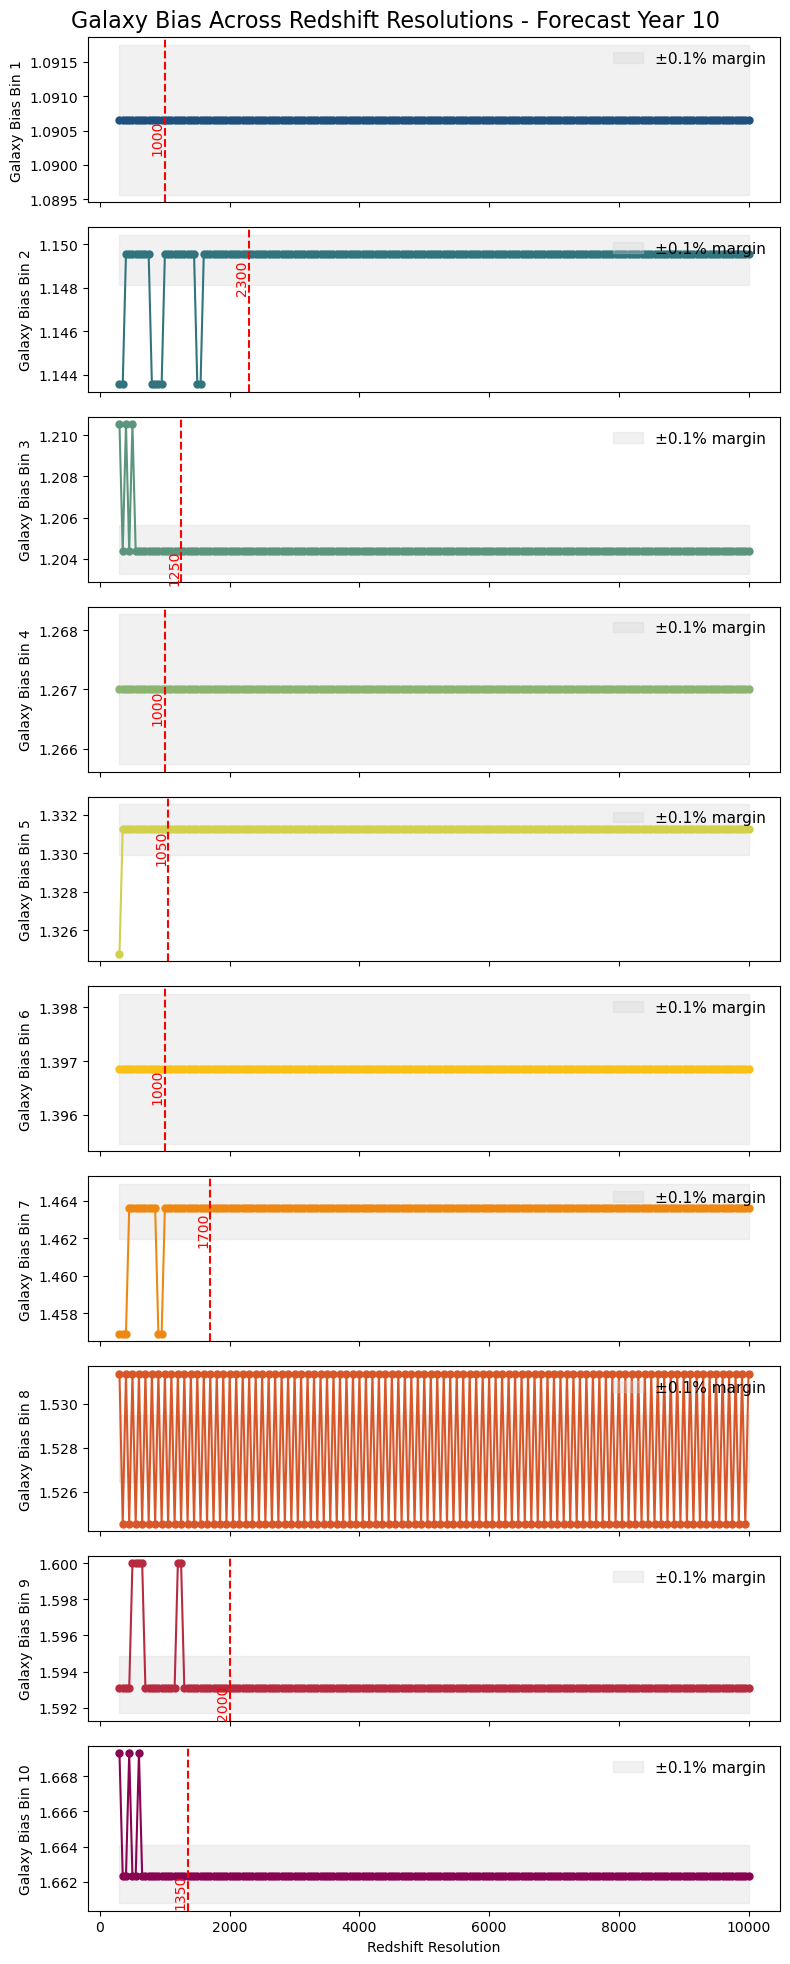

In [10]:
p.plot_gbias_values_zres_sweep(
    galaxy_bias_resolutions=galaxy_bias_zres_sweep,
    forecast_year=forecast_year,
    precision=0.1,
    stability_steps=15,
    marker_size=5
)


In [11]:
%%time
galaxy_bias_zres_and_zmax_sweep = sm.galaxy_bias_zres_and_zmax_sweep()

Data saved to data_output/galaxy_bias/galaxy_bias_zres_zmax_sweep_y10_zmax_range_3.0_to_4.0_ccl_v2.8.0.npy
CPU times: user 1min 25s, sys: 2.02 s, total: 1min 27s
Wall time: 1min 29s


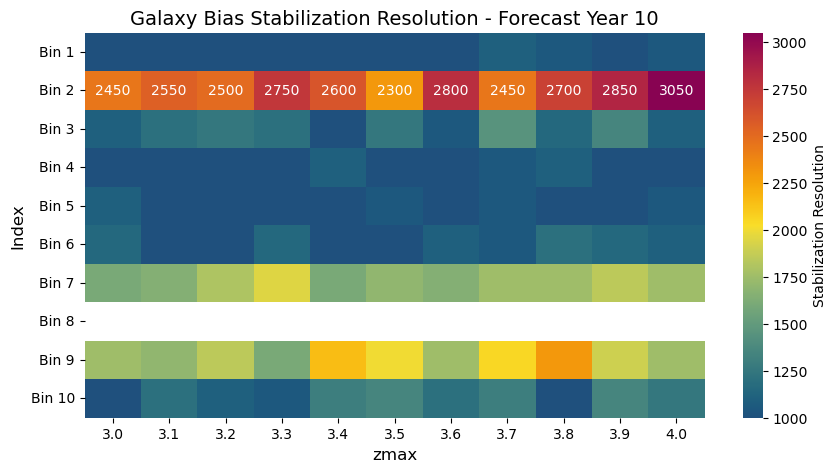

In [14]:
p.plot_gbias_value_zres_zmax_sweep(
    galaxy_bias_by_zmax_and_resolution=galaxy_bias_zres_and_zmax_sweep,
    forecast_year=forecast_year,
    precision=0.15,
    stability_steps=15,
    annotate_max=True
)
